# Вступление

Данный блокнот предаставляет собой мои записи по основам линейной алгебры, которые в случае надобности будут испоользованы мною в будущем.

Данная тема важна, потому что она лежит в основе большинства подходов машинного обучения и особенно преобладает в глубоком обучении. Линейная алгебра используется для решения разных задач в разноразмерных пространствах, позволяя машинам распознавать закономерности и делать прогнозы.

В ходе изучения данного раздела я:

* Понял основы линейной алгебры, изучил используемые подходы для решения задач в разноразмерных пространствах

* Развил некое геометрическое понимание  о том, что происходит «под капотом» алгоритмов машинного обучения и в целом для чего нужны матрицы

* Начал глубже понимать детали научных статей по машинному обучению, а также все другие дисциплины, лежащие в его основе, включая математический анализ, статистику + мат.вер и алгоритмы оптимизации



*Часть 1. Структуры данных для алгебры*

* Тензоры
* Скаляры
* Векторы и работа с ними
* Нормы и единичные векторы
* Базисные, ортогональные и ортонормированные векторы
* Массивы в NumPy  
* Матрицы
* Тензоры в TensorFlow и PyTorch

*Часть 2. Распространенные операции с тензорами*

* Транспонирование тензора
* Основные арифметические операции с тензорами
* Редукция (суммирование и т.д.)
* Скалярное произведение
* Решение систем линейных уравнений

*Часть 3. Свойства матриц*

* Норма Фробениуса
* Умножение матриц
* Симметричные и единичные матрицы
* Обращение матрицы
* Диагональные матрицы
* Ортогональные матрицы


## Часть 1: Структуры данных для алгебры

### Что такое линейная алгебра

# 1. Математическая модель

## Грабитель:

      Начал движение на 5 минут раньше

      Скорость: 2.5 км/мин

      Уравнение: d_r = 2.5 * t

## Шериф:

      Начал движение через 5 минут после грабителя

      Скорость: 3 км/мин

      Уравнение: d_s = 3 * (t - 5)


## Задача сводится к решению системы:
      
      d = 2.5t
      d = 3(t - 5)

В матричной форме это можно записать как:

$$
\begin{bmatrix}
1 & -2.5 \\
1 & -3
\end{bmatrix}
\begin{bmatrix}
d \\
t
\end{bmatrix}
=
\begin{bmatrix}
0 \\
15
\end{bmatrix}
$$


## 2. Геометрическая интерпретация
Каждое уравнение представляет прямую линию в 2D-пространстве (плоскость время-расстояние)

Точка пересечения (30, 75) - это решение системы

В линейной алгебре это называется нахождением пересечения линейных подпространств

## 3. Векторное представление
Уравнения можно записать в векторной форме:

## Для грабителя:
$$
\begin{bmatrix}
d
\end{bmatrix}
= t \times
\begin{bmatrix}
1 \\
2.5
\end{bmatrix}^T
$$

## Для шерифа:
$$
\begin{bmatrix}
d
\end{bmatrix}
=
\begin{bmatrix}
0 \\
-15
\end{bmatrix}^T
+ t \times
\begin{bmatrix}
1 \\
3
\end{bmatrix}^T
$$

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
t = np.linspace(0, 40, 1000) # начало, конец, количество

In [3]:
d_r = 2.5 * t

In [4]:
d_s = 3 * (t-5)

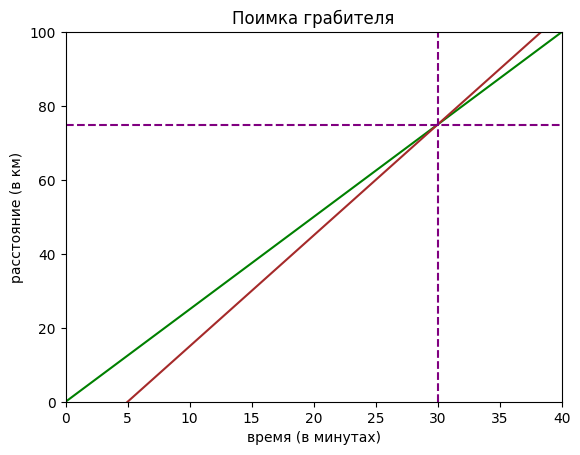

In [8]:
fig, ax = plt.subplots()
plt.title('Поимка грабителя')
plt.xlabel('время (в минутах)')
plt.ylabel('расстояние (в км)')
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
ax.plot(t, d_r, c='green')
ax.plot(t, d_s, c='brown')
plt.axvline(x=30, color='purple', linestyle='--')
_ = plt.axhline(y=75, color='purple', linestyle='--')

### Скаляры (Тензор 0-го ранга)

In [9]:
x = 25
x

25

In [10]:
type(x) # если нам нужны другие типы (int16, uint8), нам нужен Numpy или другие библиотеки для работы с цифрами

int

In [11]:
y = 3

In [12]:
py_sum = x + y
py_sum

28

In [13]:
type(py_sum)

int

In [14]:
x_float = 25.0
float_sum = x_float + y
float_sum

28.0

In [15]:
type(float_sum)

float

In [31]:
import torch

In [22]:
x_pt = torch.tensor(25)
print(x_pt)
type(x_pt)

tensor(25)


torch.Tensor

In [19]:
x_pt.shape

torch.Size([])

### Скаляры в TensorFlow

[Документация](https://www.tensorflow.org/guide/tensor):  

* `tf.Variable`
* `tf.constant`
* `tf.placeholder`
* `tf.SparseTensor`


In [1]:
import tensorflow as tf

In [2]:
x_tf = tf.Variable(25, dtype=tf.int16)
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=25>

In [3]:
x_tf.shape

TensorShape([])

In [7]:
y_tf = tf.Variable(25, dtype=tf.int16)

Сумма

In [8]:
x_tf + y_tf

<tf.Tensor: shape=(), dtype=int16, numpy=50>

In [9]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=50>

In [10]:
tf_sum.numpy()

np.int16(50)

In [11]:
type(tf_sum.numpy())

numpy.int16

In [12]:
tf_float = tf.Variable(.24, dtype=tf.float16)
tf_float

<tf.Variable 'Variable:0' shape=() dtype=float16, numpy=0.239990234375>

### Векторы (Тензоры Ранга 1 ) NumPy

In [17]:
import numpy as np

x = np.array([25, 2, 5])
print(len(x))
print(x.shape)
print(type(x))
print(x[0])
print(type(x[0]))

3
(3,)
<class 'numpy.ndarray'>
25
<class 'numpy.int64'>


### Транспозиция векторов

In [19]:
# Транспозиция обычного 1-мерного массива ничего не делает...
x_t = x.T
print(x_t)
print(x_t.shape)

[25  2  5]
(3,)


In [25]:
# ...но квадратные скобки в стиле матриц:
y = np.array([[25, 2, 5]])
print(y)
print(y.shape)
y_t = y.T
print(y_t)
print(y_t.shape)

[[25  2  5]]
(1, 3)
[[25]
 [ 2]
 [ 5]]
(3, 1)


In [26]:
y_t.T

array([[25,  2,  5]])

In [27]:
y_t.T.shape

(1, 3)

### Нулевые векторы


In [28]:
z = np.zeros(3)
z

array([0., 0., 0.])

### Векторы в PyTorch и TensorFlow

In [32]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [33]:
x_tf = tf.Variable([25, 2, 5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

### $L^2$ Норма

L₂-норма — квадратный корень из суммы квадратов компонент, обычное евклидово расстояние. Широко используется для измерения расстояний и в L₂-регуляризации.

$$||\mathbf{x}||_2 = \sqrt{\sum x_i^2}$$

In [39]:
x
print('L2 норма по формуле: ',(25**2 + 2**2 + 5**2)**(1/2))
np.linalg.norm(x)

L2 норма по формуле:  25.573423705088842


np.float64(25.573423705088842)

если единицы измерения в этом трёхмерном векторном пространстве — метры, то вектор $x$ имеет длину 25,6 м.

### $L^1$ Норма

L₁-норма — сумма абсолютных значений компонент вектора. Измеряет общее абсолютное отклонение и создаёт разреженные решения в машинном обучении.

$$||\mathbf{x}||_1 = \sum_{i=1}^{n} |x_i|$$

In [42]:
x
np.abs(25) + np.abs(2) + np.abs(5)

np.int64(32)

### Квадратная $L^2$ Норма

Квадрат L₂-нормы — сумма квадратов компонент без извлечения корня. Вычислительно эффективнее самой L₂-нормы и часто используется в оптимизации.

In [43]:
x

array([25,  2,  5])

In [44]:
(25**2 + 2**2 + 5**2)

654

In [45]:
np.dot(x, x)

np.int64(654)

### Макс-норма

Макс-норма (Max Norm) — это норма, которая равна максимальному абсолютному значению среди всех компонент вектора.

Она показывает наибольшее отклонение по любой из координат и широко используется в машинном обучении для ограничения весов нейронных сетей.

$||\mathbf{x}||_\infty = \max_{i} |x_i|$

In [49]:
x

array([25,  2,  5])

In [50]:
np.max([np.abs(25), np.abs(2), np.abs(5)])

np.int64(25)

### Ортогональные вектора

Ортогональные векторы — это векторы, угол между которыми составляет 90 градусов. Их скалярное произведение равно нулю, что означает отсутствие проекции одного вектора на другой.

In [51]:
i = np.array([1, 0])
j = np.array([0, 1])
np.dot(i, j)


np.int64(0)

### Матрицы (Тензоры 2-го ранга) NumPy

\begin{bmatrix}
25 & 2 \\
5 & 26 \\
3 & 7
\end{bmatrix}

In [61]:
X = np.array([[25, 2], [5, 26], [3, 7]])
print(X)
print('\n', X.shape)
print('\n',X.size)
print('\n',X[:,0]) # 1 столбец
print('\n',X[1,:]) # средний ряд
print('\n', X[0:2, 0:2])

[[25  2]
 [ 5 26]
 [ 3  7]]

 (3, 2)

 6

 [25  5  3]

 [ 5 26]

 [[25  2]
 [ 5 26]]


### Матрицы PyTorch

In [62]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [63]:
X_pt.shape

torch.Size([3, 2])

In [64]:
X_pt[1,:]

tensor([ 5, 26])

### Матрицы in TensorFlow

In [65]:
X_tf = tf.Variable([[25, 2], [5, 26], [3, 7]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]], dtype=int32)>

In [66]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [67]:
tf.shape(X_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2], dtype=int32)>

In [68]:
X_tf[1,:]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 26], dtype=int32)>

### Тензоры высших рангов

В качестве примера, тензоры ранга 4 часто используются для изображений, где каждое измерение соответствует:

1. Количеству изображений в обучающей выборке, например, 32
2. Высоте изображения в пикселях, например, 28 для [цифр MNIST](http://yann.lecun.com/exdb/mnist/)
3. Ширине изображения в пикселях, например, 28
4. Количеству цветовых каналов, например, 3 для полноцветных изображений (RGB)

In [69]:
images_pt = torch.zeros([32, 28, 28, 3])

In [71]:
images_pt

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         ...,

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0.

In [72]:
images_tf = tf.zeros([32, 28, 28, 3])

In [73]:
images_tf

<tf.Tensor: shape=(32, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


   

## Часть 2: Распространенные операция с тензорами

### Транспозиция Тензоров

In [74]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [75]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [76]:
X_pt.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

In [77]:
tf.transpose(X_tf)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]], dtype=int32)>

### Базовые арифметические операции

Сложение или умножение на скаляр производится со всеми элементами тензора

In [78]:
X*2

array([[50,  4],
       [10, 52],
       [ 6, 14]])

In [79]:
X+2

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [80]:
X*2+2

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [82]:
X_pt*2+2 # Альтернатива torch.mul() или torch.add()

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [83]:
torch.add(torch.mul(X_pt, 2), 2)

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [84]:
X_tf*2+2

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [85]:
tf.add(tf.multiply(X_tf, 2), 2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

Если два тензора имеют одинаковый размер, операции часто применяются поэлементно. Это не матричное умножение а так называемое произведение Адамара или просто поэлементное произведение.

Математическое обозначение: $A \odot X$

In [86]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [87]:
A = X+2
A

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [88]:
A + X

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [89]:
A * X

array([[675,   8],
       [ 35, 728],
       [ 15,  63]])

In [90]:
A_pt = X_pt + 2

In [91]:
A_pt + X_pt

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [92]:
A_pt * X_pt

tensor([[675,   8],
        [ 35, 728],
        [ 15,  63]])

In [93]:
A_tf = X_tf + 2

In [94]:
A_tf + X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [95]:
A_tf * X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[675,   8],
       [ 35, 728],
       [ 15,  63]], dtype=int32)>

### Редукция (Суммирование)

Вычисление суммы всех элементов тензора является распространенной операцией. Например:

* Для вектора ***x*** длины *n* мы вычисляем $\sum_{i=1}^{n} x_i$
* Для матрицы ***X*** размерностью *m* на *n* мы вычисляем $\sum_{i=1}^{m} \sum_{j=1}^{n} X_{i,j}$

In [96]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [97]:
X.sum()

np.int64(68)

In [98]:
torch.sum(X_pt)

tensor(68)

In [99]:
tf.reduce_sum(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=68>

In [101]:
X.sum(axis=0) # columns

array([33, 35])

In [102]:
X.sum(axis=1) # raws

array([27, 31, 10])

In [103]:
torch.sum(X_pt, 0)

tensor([33, 35])

In [104]:
tf.reduce_sum(X_tf, 1)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([27, 31, 10], dtype=int32)>

### The Dot Product

Если есть два вектора (скажем, *x* и *y*) одинаковой длины *n*, можно вычислить скалярное произведение между ними. Это обозначается несколькими различными способами, включая следующие:

$x \cdot y$

$x^Ty$

$\langle x,y \rangle$

Независимо от нотации, вычисление одинаково; произведение поэлементно, а затем суммирование произведения до скалярного значения

$x \cdot y = \sum_{i=1}^{n} x_i y_i$

Скалярное произведение повсеместно используется в ML;DL, оно выполняется в каждом искусственном нейроне глубокой нейронной сети, которая может состоять из миллионов (или на порядки больше) таких нейронов



In [105]:
x

array([25,  2,  5])

In [106]:
y = np.array([0, 1, 2])
y

array([0, 1, 2])

In [107]:
25*0 + 2*1 + 5*2

12

In [108]:
np.dot(x, y)

np.int64(12)

In [109]:
x_pt

tensor([25,  2,  5])

In [110]:
y_pt = torch.tensor([0, 1, 2])
y_pt

tensor([0, 1, 2])

In [111]:
np.dot(x_pt, y_pt)

/tmp/ipython-input-91207232.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.dot(x_pt, y_pt)


np.int64(12)

In [112]:
torch.dot(torch.tensor([25, 2, 5.]), torch.tensor([0, 1, 2.]))

tensor(12.)

In [113]:
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

In [114]:
y_tf = tf.Variable([0, 1, 2])
y_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([0, 1, 2], dtype=int32)>

In [115]:
tf.reduce_sum(tf.multiply(x_tf, y_tf))

<tf.Tensor: shape=(), dtype=int32, numpy=12>

**Return to slides here.**

### Решение систем линейный уравнений

В примере с *Подстановкой* два уравнения в системе имеют вид:
$$ y = 3x $$
$$ -5x + 2y = 2 $$

Второе уравнение можно преобразовать, чтобы выразить $y$:
$$ 2y = 2 + 5x $$
$$ y = \frac{2 + 5x}{2} = 1 + \frac{5x}{2} $$

In [120]:
x = np.linspace(-10, 10, 1000)

In [121]:
y1 = 3 * x

In [122]:
y2 = 1 + (5*x)/2

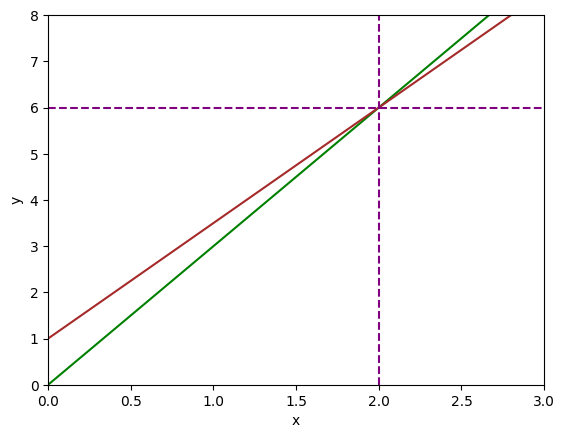

In [123]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([0, 3])
ax.set_ylim([0, 8])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=2, color='purple', linestyle='--')
_ = plt.axhline(y=6, color='purple', linestyle='--')

В примере с **Исключением** два уравнения в системе имеют вид:
$$ 2x - 3y = 15 $$
$$ 4x + 10y = 14 $$

Оба уравнения можно преобразовать, чтобы выразить $y$
Первое уравнение:
$$ -3y = 15 - 2x $$
$$ y = \frac{15 - 2x}{-3} = -5 + \frac{2x}{3} $$

Второе уравнение:
$$ 4x + 10y = 14 $$
$$ 2x + 5y = 7 $$
$$ 5y = 7 - 2x $$
$$ y = \frac{7 - 2x}{5} $$

In [124]:
y1 = -5 + (2*x)/3

In [125]:
y2 = (7-2*x)/5

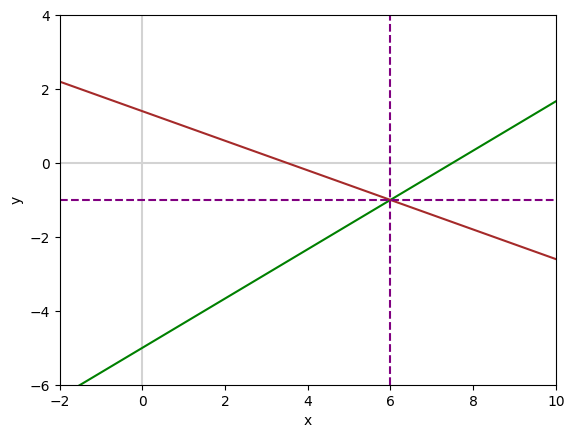

In [126]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')

plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 10]) # ограничения на х и у
ax.set_ylim([-6, 4])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=6, color='purple', linestyle='--')       # вертикальная линия при x=6
_ = plt.axhline(y=-1, color='purple', linestyle='--')  # горизонтальная линия при y=-1

## Часть 3: Свойства матриц

### Евклидова норма

In [128]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [129]:
(1**2 + 2**2 + 3**2 + 4**2)**(1/2)

5.477225575051661

In [130]:
np.linalg.norm(X) # такая же функция как и для ветора в L2 норме

np.float64(5.477225575051661)

In [131]:
X_pt = torch.tensor([[1, 2], [3, 4.]]) # torch.norm() поддерживает только floats

In [132]:
torch.norm(X_pt)

tensor(5.4772)

In [133]:
X_tf = tf.Variable([[1, 2], [3, 4.]]) # tf.norm() поддерживает только floats

In [134]:
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.4772257804870605>

### Умножение матрицы на вектор

In [138]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [139]:
b = np.array([1, 2])
b

array([1, 2])

In [137]:
np.dot(A, b)

array([11, 17, 23])

In [140]:
A_pt = torch.tensor([[3, 4], [5, 6], [7, 8]])
A_pt

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [141]:
b_pt = torch.tensor([1, 2])
b_pt

tensor([1, 2])

In [ ]:
torch.matmul(A_pt, b_pt)

tensor([11, 17, 23])

In [147]:
def matrix_vector_multiply(A, B):
    # Проверяем размерности
    if isinstance(B[0], (list, tuple)):  # B - матрица
        if len(A[0]) != len(B):
            raise ValueError("Несовместимые размеры матриц")

        result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]

        for i in range(len(A)):
            for j in range(len(B[0])):
                for k in range(len(B)):
                    result[i][j] += A[i][k] * B[k][j]

    else:  # B - вектор
        if len(A[0]) != len(B):
            raise ValueError("Несовместимые размеры: матрица и вектор")

        result = [0 for _ in range(len(A))]

        for i in range(len(A)):
            for k in range(len(B)):
                result[i] += A[i][k] * B[k]

    return result

A = [[3, 4], [5, 6], [7, 8]]
B = [1, 2]
C = matrix_vector_multiply(A, B)

print("Матрица A:")
for row in A:
    print(row)
print("\nВектор B:")
print(B)
print("\nРезультат умножения A × B:")
print(C)

Матрица A:
[3, 4]
[5, 6]
[7, 8]

Вектор B:
[1, 2]

Результат умножения A × B:
[11, 17, 23]


In [148]:
A_tf = tf.Variable([[3, 4], [5, 6], [7, 8]])
A_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [7, 8]], dtype=int32)>

In [149]:
b_tf = tf.Variable([1, 2])
b_tf

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>

In [150]:
tf.linalg.matvec(A_tf, b_tf)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 17, 23], dtype=int32)>

### Умножение матрицы на матрицу

In [151]:
A

[[3, 4], [5, 6], [7, 8]]

In [152]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [153]:
np.dot(A, B)

array([[11, 27],
       [17, 45],
       [23, 63]])


Заметьте, что матричное умножение не является «коммутативным» (то есть, $AB \neq BA$), поэтому раскомментирование следующей строки вызовет ошибку несоответствия размеров:

In [154]:
np.dot(B, A)

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

In [155]:
B_pt = torch.from_numpy(B)
B_pt

tensor([[1, 9],
        [2, 0]])

In [156]:
B_pt = torch.tensor([[1, 2], [9, 0]]).T
B_pt

tensor([[1, 9],
        [2, 0]])

In [157]:
torch.matmul(A_pt, B_pt)

tensor([[11, 27],
        [17, 45],
        [23, 63]])

In [158]:
B_tf = tf.convert_to_tensor(B, dtype=tf.int32)
B_tf

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 9],
       [2, 0]], dtype=int32)>

In [159]:
tf.matmul(A_tf, B_tf)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 27],
       [17, 45],
       [23, 63]], dtype=int32)>

### Симметричные матрицы

Симметричные матрицы — это квадратные матрицы, которые совпадают со своей транспонированной версией: $A = A^T$

In [160]:
X_sym = np.array([[0, 1, 2], [1, 7, 8], [2, 8, 9]])
X_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [161]:
X_sym.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

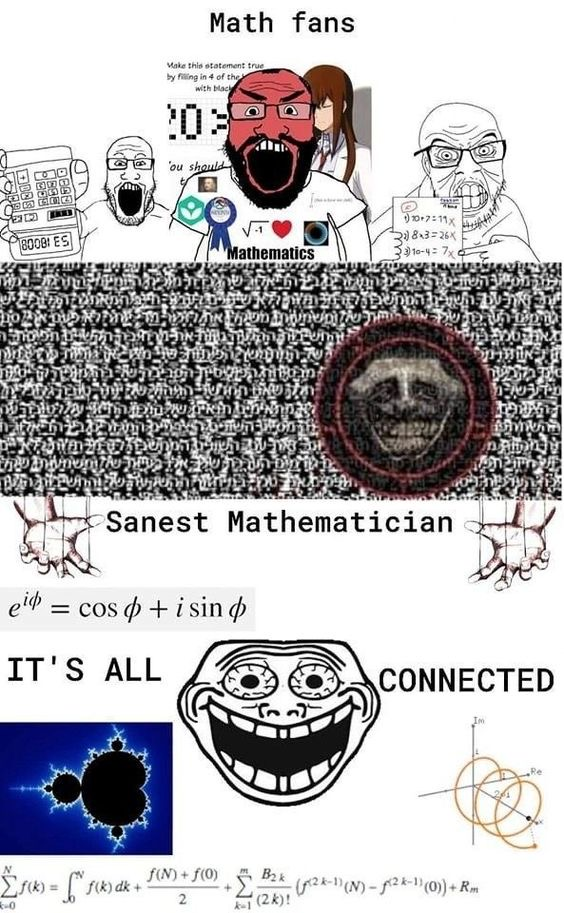

In [162]:
X_sym.T == X_sym

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Единичная матрица

In [163]:
I = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [164]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [165]:
torch.matmul(I, x_pt)

tensor([25,  2,  5])

### Какие размеры должны быть у матриц для умножения?

* Если матрица A имеет размер m × n

* А матрица B имеет размер p × q

* То n должно равняться p

* Результат будет размером m × q

## Является ли матричное умножение коммутативным?

* НЕТ, AB ≠ BA в общем случае

* Порядок умножения важен!

In [166]:
M_q = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
M_q

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [167]:
V_q = torch.tensor([[-1, 1, -2], [0, 1, 2]]).T
V_q

tensor([[-1,  0],
        [ 1,  1],
        [-2,  2]])

In [168]:
torch.matmul(M_q, V_q)

tensor([[ -3,   5],
        [ -9,  14],
        [-15,  23]])

### Невырожденная матрица

квадратная матрица, определитель которой отличен от нуля.

In [173]:
X = np.array([[4, 2], [-5, -3]]) # матрица коэффициентов
X

array([[ 4,  2],
       [-5, -3]])

In [174]:
Xinv = np.linalg.inv(X) # Обратная матрица X⁻¹
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

Докажем что $X^{-1}X = I_n$:

In [175]:
np.dot(Xinv, X) # Должно получиться единичная матрица

array([[1.00000000e+00, 3.33066907e-16],
       [0.00000000e+00, 1.00000000e+00]])

In [177]:
y = np.array([4, -7]) # вектор
y

array([ 4, -7])

Система: X × w = y

Решение: w = X⁻¹ × y

In [178]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

In [179]:
np.dot(X, w)

array([ 4., -7.])

Математическая суть:
Метод обратной матрицы работает только когда:

Матрица квадратная (n × n)

Определитель ≠ 0 (матрица обратима)

Решение: w = X⁻¹y

**Геометрический вид**

Система
$$ 4b + 2c = 4 $$
$$ -5b - 3c = -7 $$

Оба уравнения можно преобразовать, чтобы выразить переменную, например, $c$. Начнем с первого уравнения:
$$ 4b + 2c = 4 $$
$$ 2b + c = 2 $$
$$ c = 2 - 2b $$

Затем для второго уравнения:
$$ -5b - 3c = -7 $$
$$ -3c = -7 + 5b $$
$$ c = \frac{-7 + 5b}{-3} = \frac{7 - 5b}{3} $$

In [180]:
b = np.linspace(-10, 10, 1000)

In [181]:
c1 = 2 - 2*b

In [182]:
c2 = (7-5*b)/3

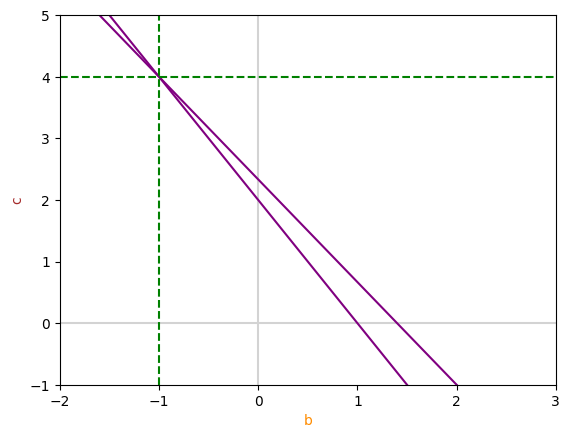

In [183]:
fig, ax = plt.subplots()
plt.xlabel('b', c='darkorange')
plt.ylabel('c', c='brown')

plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 3])
ax.set_ylim([-1, 5])
ax.plot(b, c1, c='purple')
ax.plot(b, c2, c='purple')
plt.axvline(x=-1, color='green', linestyle='--')
_ = plt.axhline(y=4, color='green', linestyle='--')

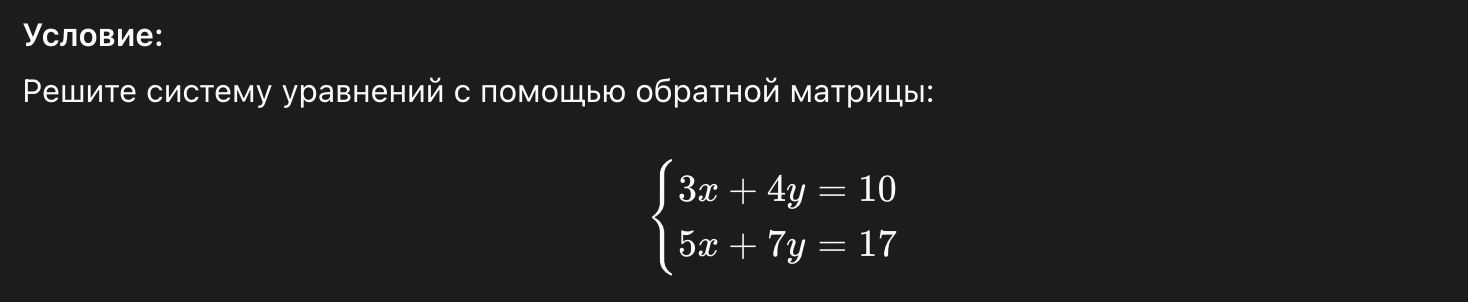

In [215]:
import numpy as np

# Решение в одну строку
A = np.array([[3, 4], [5, 7]])
b = np.array([10, 17])

# Проверяем определитель и решаем
if np.linalg.det(A) != 0:
    solution = np.linalg.inv(A) @ b
    print(f"Решение: x = {solution[0]}, y = {solution[1]}")
else:
    print("Система не имеет единственного решения")


Решение: x = 2.0000000000000053, y = 1.0000000000000036


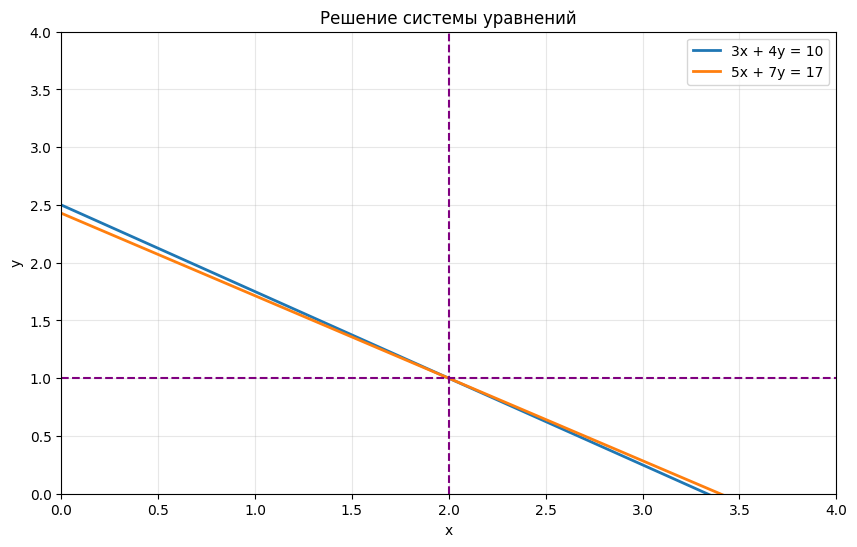

In [216]:
x_vals = np.linspace(0, 4, 100)
y1_vals = (10 - 3*x_vals) / 4  # из первого уравнения: 3x + 4y = 10
y2_vals = (17 - 5*x_vals) / 7  # из второго уравнения: 5x + 7y = 17

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y1_vals, label='3x + 4y = 10', linewidth=2)
plt.plot(x_vals, y2_vals, label='5x + 7y = 17', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x=2, color='purple', linestyle='--')
_ = plt.axhline(y=1, color='purple', linestyle='--')
plt.title('Решение системы уравнений')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis([0, 4, 0, 4])
plt.show()

В PyTorch и TensorFlow:

In [217]:
torch.inverse(torch.tensor([[4, 2], [-5, -3.]])) # float

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [225]:
import tensorflow as tf

a = tf.linalg.inv(tf.constant([[4., 2.], [-5., -3.]]))
b = tf.constant([[10.], [17.]])


s = a @ b

print("a (обратная матрица), форма:", a.shape)
print(a.numpy())
print("\nb (вектор-столбец), форма:", b.shape)
print(b.numpy())
print("\ns = a @ b, форма:", s.shape)
print(s.numpy())

solution = tf.reshape(s, [-1])
print("\nРешение как вектор:")
print(solution.numpy())

a (обратная матрица), форма: (2, 2)
[[ 1.4999998  0.9999998]
 [-2.4999995 -1.9999996]]

b (вектор-столбец), форма: (2, 1)
[[10.]
 [17.]]

s = a @ b, форма: (2, 1)
[[ 31.999994]
 [-58.99999 ]]

Решение как вектор:
[ 31.999994 -58.99999 ]


Ответы не такие из за чисел с плавающей точкой

### Уравнение матрицы, для которого не существует решения

матрица не является инвертируемой.


Матрица не является инвертируемой, если:


Её размер не квадратный. Для инвертирования матрица должна иметь одинаковое количество строк и столбцов.

Её определитель равен нулю. В таком случае матрица считается особенной или вырожденной.

In [229]:
X = np.array([[-4, 1], [-8, 2]])
a = np.linalg.det(X)
a

np.float64(0.0)

In [187]:
# Xinv = np.linalg.inv(X)

LinAlgError: Singular matrix

### Ортогональные Матрицы


In [231]:
I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I
a = np.linalg.det(I)
a

np.float64(1.0)

In [232]:
column_1 = I[:,0]
column_1

array([1, 0, 0])

In [233]:
column_2 = I[:,1]
column_2

array([0, 1, 0])

In [234]:
column_3 = I[:,2]
column_3

array([0, 0, 1])

In [235]:
np.dot(column_1, column_2)

np.int64(0)

In [236]:
np.dot(column_1, column_3)

np.int64(0)

In [237]:
np.dot(column_2, column_3)

np.int64(0)

In [238]:
np.linalg.norm(column_1)

np.float64(1.0)

In [239]:
np.linalg.norm(column_2)

np.float64(1.0)

In [240]:
np.linalg.norm(column_3)

np.float64(1.0)